In [1]:
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

In [2]:
from sklearn.cluster import KMeans
import prepare 

In [3]:
df = prepare.wrangle_zillow()

In [4]:
df.shape

(63657, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63657 entries, 0 to 63656
Data columns (total 33 columns):
propertylandusetypeid           63657 non-null object
parcelid                        63657 non-null object
id                              63657 non-null object
bathroomcnt                     63657 non-null float64
bedroomcnt                      63657 non-null float64
buildingqualitytypeid           63657 non-null float64
calculatedfinishedsquarefeet    63657 non-null float64
finishedsquarefeet12            63657 non-null float64
fips                            63657 non-null int64
latitude                        63657 non-null object
longitude                       63657 non-null object
lotsizesquarefeet               63657 non-null float64
propertycountylandusecode       63657 non-null object
rawcensustractandblock          63657 non-null float64
regionidcity                    63657 non-null float64
regionidcounty                  63657 non-null object
regionidzip         

In [6]:
df.head(3)

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county
0,261,14297519,1727539,3.5,4.0,8.0,3100.0,3100.0,6059,3.36349e+07,...,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential,CA,Orange County
1,261,14186244,11677,2.0,3.0,8.0,1243.0,1243.0,6059,3.38862e+07,...,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential,CA,Orange County
2,266,14705431,2116302,2.5,3.0,8.0,1337.0,1337.0,6059,3.36637e+07,...,463974.0,6675.04,6.059099e+13,12,-0.028835,2017-01-02,None,Condominium,CA,Orange County


In [7]:
continuous_data = df.select_dtypes(include=["int", "float"])

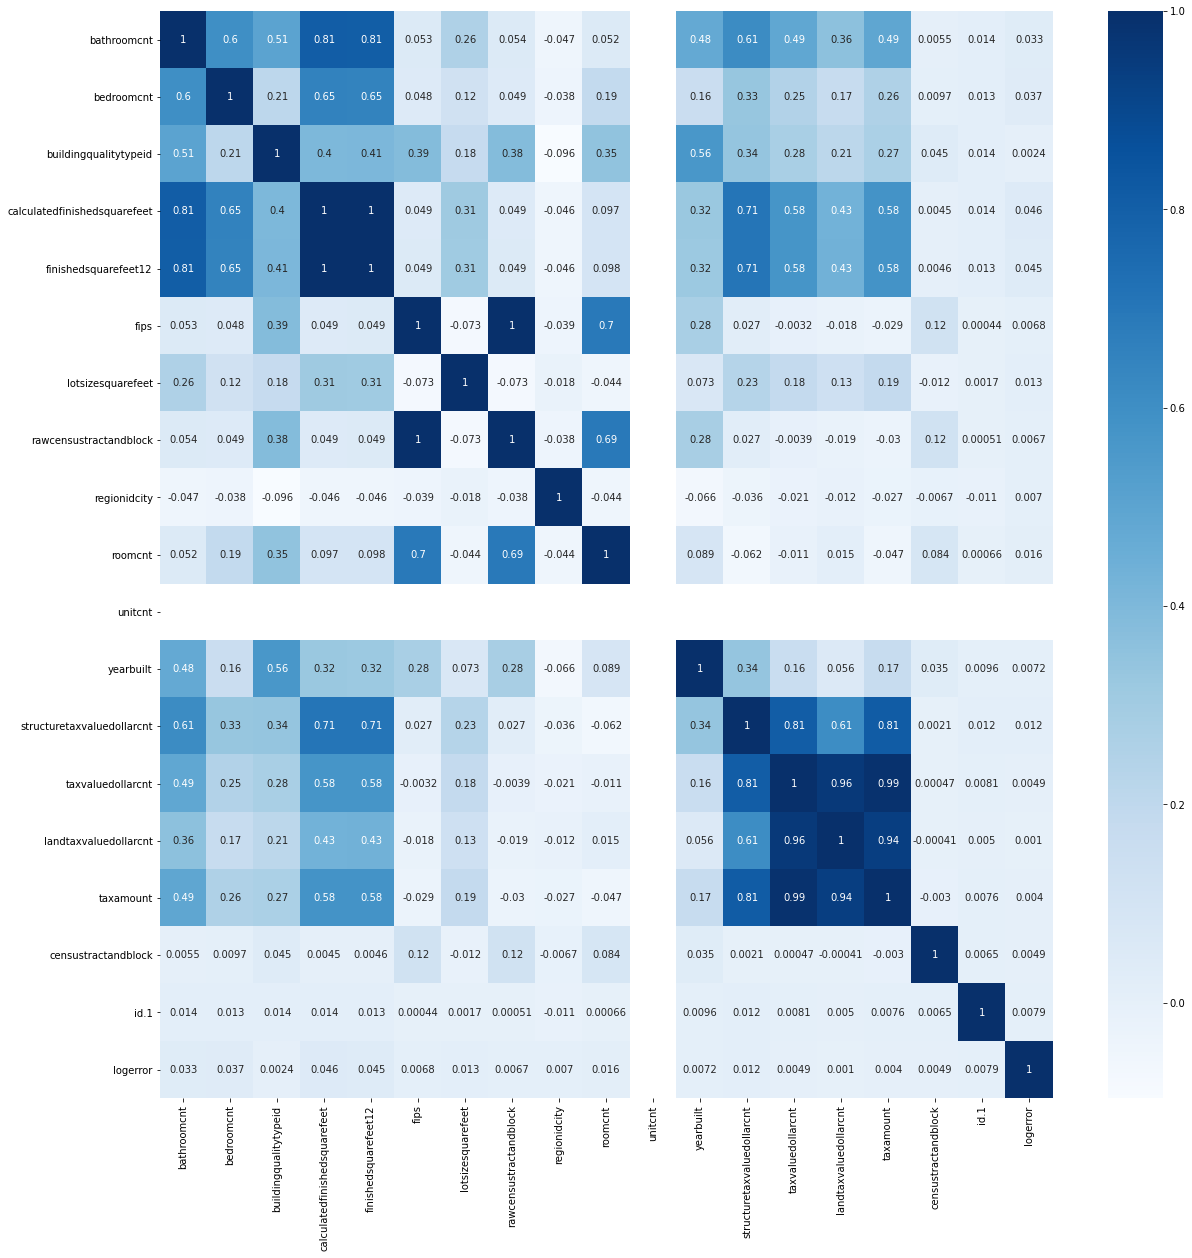

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(continuous_data.corr(), cmap='Blues', annot=True)
#plt.ylim(0, 4)

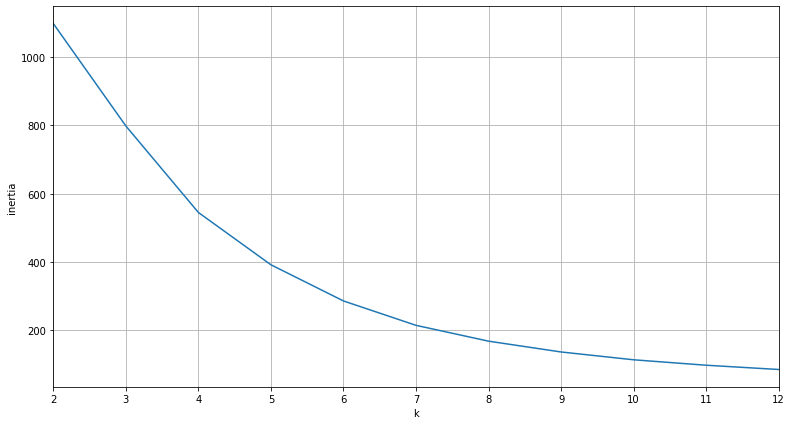

In [9]:
X = df[['logerror']]

def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [10]:
kmeans = KMeans(5).fit(X)
df['cluster_target'] = kmeans.labels_
df.cluster_target = 'cluster_target' + df.cluster_target.astype(str)

In [11]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,logerror
0,0.010223
1,0.344828
2,-2.265634
3,1.888202
4,-0.219331


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e942dd0>]],
      dtype=object)

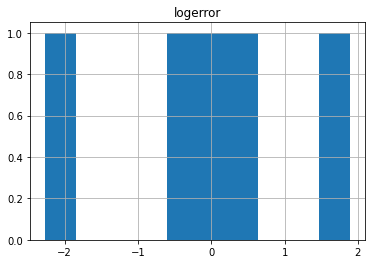

In [12]:
centroids.hist()

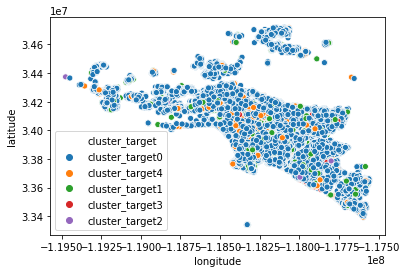

In [14]:
sns.scatterplot(x='longitude', y='latitude',hue="cluster_target", data=df)
plt.show()

Takeaway: It seems vast majority data points' logerror fell into cluster0 which has the lowest log error.

In [16]:
X = df[['latitude', 'longitude', 'finishedsquarefeet12']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

In [17]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,latitude,longitude,logerror
0,3.393660e+07,-1.180340e+08,0.020232
1,3.423513e+07,-1.189803e+08,0.015945
2,3.365472e+07,-1.177675e+08,0.021468
3,3.412039e+07,-1.184139e+08,0.009383
4,3.463046e+07,-1.181402e+08,0.013113


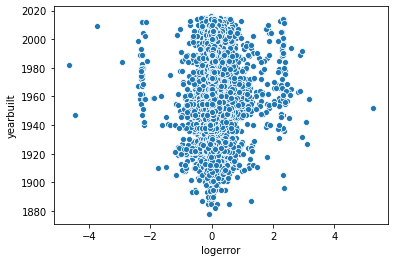

In [21]:
sns.scatterplot(x='logerror',y='yearbuilt', data = df)

In [27]:
X = df[['latitude', 'longitude','finishedsquarefeet12']]

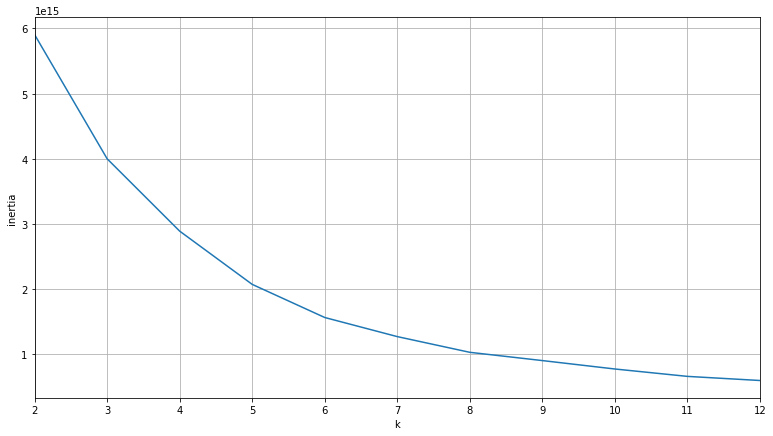

In [28]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [29]:
kmeans = KMeans(5)
kmeans.fit(X)
kmeans.predict(X)

array([0, 2, 0, ..., 2, 2, 2], dtype=int32)

In [30]:
df['cluster_location&size'] = kmeans.predict(X)
df.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,cluster,cluster_location&size
0,261,14297519,1727539,3.5,4.0,8.0,3100.0,3100.0,6059,3.36349e+07,...,0,0.025595,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,3,0
1,261,14186244,11677,2.0,3.0,8.0,1243.0,1243.0,6059,3.38862e+07,...,2,0.005383,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,1,2
2,266,14705431,2116302,2.5,3.0,8.0,1337.0,1337.0,6059,3.36637e+07,...,12,-0.028835,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,3,0
3,261,13944538,249412,2.5,3.0,8.0,1340.0,1340.0,6059,3.37714e+07,...,13,0.045602,2017-01-02,None,Single Family Residential,CA,Orange County,cluster_target0,1,2
4,266,14731691,2205733,2.0,2.0,8.0,970.0,970.0,6059,3.37156e+07,...,14,-0.008935,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,3,0


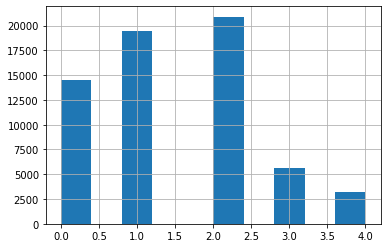

In [34]:
df['cluster_location&size'].hist()

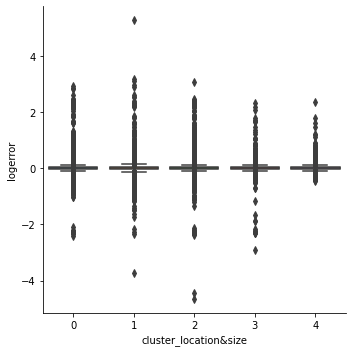

In [32]:
sns.catplot(x="cluster_location&size", y="logerror", kind="box", data=df)

In [36]:
df['age'] = 2017 - df.yearbuilt

In [37]:
df.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,cluster,cluster_location&size,age
0,261,14297519,1727539,3.5,4.0,8.0,3100.0,3100.0,6059,3.36349e+07,...,0.025595,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,3,0,19.0
1,261,14186244,11677,2.0,3.0,8.0,1243.0,1243.0,6059,3.38862e+07,...,0.005383,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,1,2,55.0
2,266,14705431,2116302,2.5,3.0,8.0,1337.0,1337.0,6059,3.36637e+07,...,-0.028835,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,3,0,28.0
3,261,13944538,249412,2.5,3.0,8.0,1340.0,1340.0,6059,3.37714e+07,...,0.045602,2017-01-02,None,Single Family Residential,CA,Orange County,cluster_target0,1,2,37.0
4,266,14731691,2205733,2.0,2.0,8.0,970.0,970.0,6059,3.37156e+07,...,-0.008935,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,3,0,28.0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Let's scale the numeric columns
scaler = MinMaxScaler()
numeric_columns = list(df.select_dtypes('number').columns)
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [44]:
df.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,cluster,cluster_location&size,age,taxrate
0,261,14297519,1727539,0.35,0.363636,0.636364,0.202163,0.202163,0.297297,3.36349e+07,...,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,0.75,0.0,0.130435,0.023461
1,261,14186244,11677,0.20,0.272727,0.636364,0.075845,0.075845,0.297297,3.38862e+07,...,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,0.25,0.5,0.391304,0.025062
2,266,14705431,2116302,0.25,0.272727,0.636364,0.082239,0.082239,0.297297,3.36637e+07,...,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,0.75,0.0,0.195652,0.025020
3,261,13944538,249412,0.25,0.272727,0.636364,0.082443,0.082443,0.297297,3.37714e+07,...,2017-01-02,None,Single Family Residential,CA,Orange County,cluster_target0,0.25,0.5,0.260870,0.027865
4,266,14731691,2205733,0.20,0.181818,0.636364,0.057275,0.057275,0.297297,3.37156e+07,...,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,0.75,0.0,0.195652,0.029232


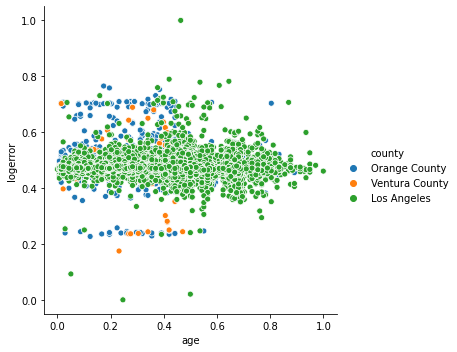

In [48]:
sns.relplot(x="age", y="logerror", hue = 'county',data=df)

Takeway: Houses in Orange County and Ventura county has a relative younger age, has higher logerror deviation.

In [ ]:
# create taxrate variable
df['taxrate'] = df.taxamount/df.taxvaluedollarcnt

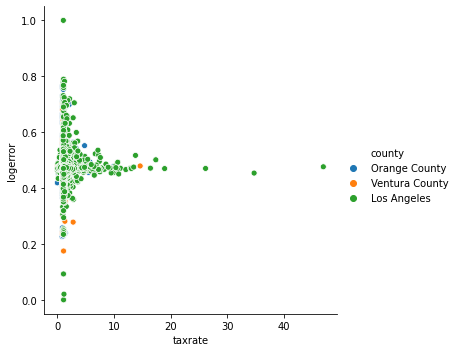

In [51]:
sns.relplot(x="taxrate", y="logerror", hue = 'county',data=df)

In [52]:
df.head(1)

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,cluster,cluster_location&size,age,taxrate
0,261,14297519,1727539,0.35,0.363636,0.636364,0.202163,0.202163,0.297297,3.36349e+07,...,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,0.75,0.0,0.130435,0.94807


     k           sse
0    2  5.905264e+15
1    3  3.999961e+15
2    4  2.889793e+15
3    5  2.072665e+15
4    6  1.564361e+15
5    7  1.271274e+15
6    8  1.030166e+15
7    9  9.033769e+14
8   10  7.742528e+14
9   11  6.609102e+14
10  12  5.977320e+14
11  13  5.444319e+14
12  14  5.008308e+14
13  15  4.596577e+14
14  16  4.300262e+14
15  17  4.026044e+14
16  18  3.776264e+14
17  19  3.562698e+14


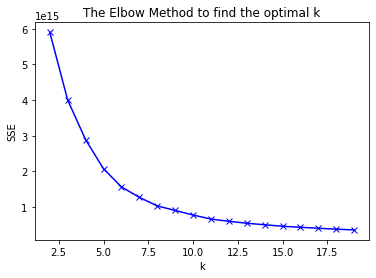

In [53]:
cluster_vars = df[['latitude', 'longitude', 'age']]

ks = range(2,20)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_vars)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()